<a href="https://colab.research.google.com/github/sainahah/sainah-sreeram-wasserstoff-AiInternTask/blob/main/Wastroff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE SEGMENTATION**

In [ ]:
!pip install torch torchvision matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Saving living-room-indoor-plants.jpg to living-room-indoor-plants (1).jpg


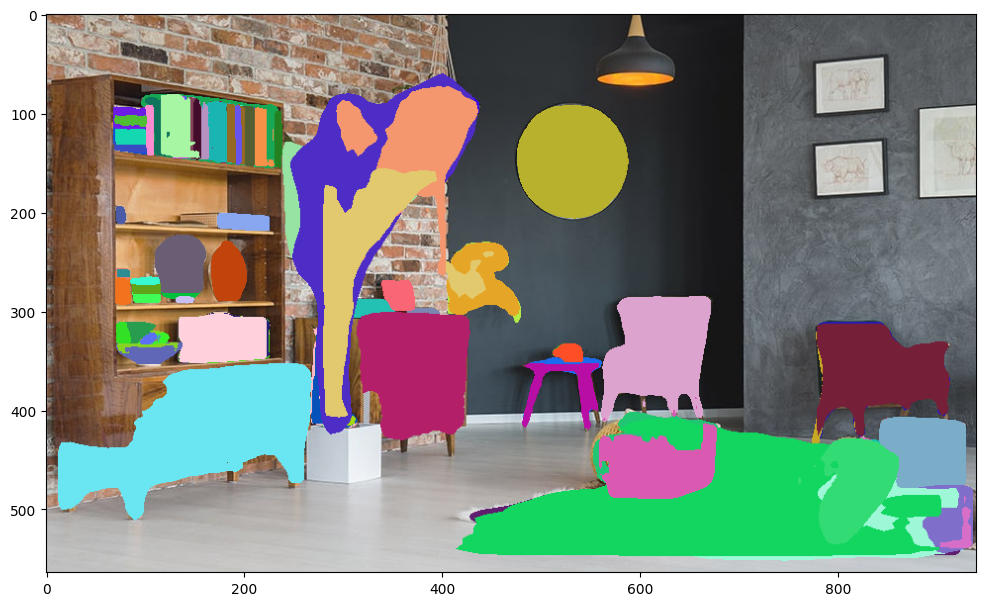

In [ ]:
# Install necessary libraries
!pip install torch torchvision matplotlib

# Import libraries
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# Function to load image
def load_image(image_path):
    image = Image.open(image_path)
    transform = T.Compose([T.ToTensor()])
    return transform(image)

# Function to plot segmented image
def plot_segmented_image(image, masks, boxes, labels):
    fig, ax = plt.subplots(1, figsize=(12, 9))
    image_np = image.permute(1, 2, 0).cpu().numpy()
    ax.imshow(image_np)

    for i in range(masks.shape[0]):
        mask = masks[i, 0].cpu().numpy()
        color = np.random.rand(3)
        for c in range(3):
            image_np[:, :, c] = np.where(mask > 0.5, color[c], image_np[:, :, c])

    ax.imshow(image_np)
    plt.show()

# Load pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Upload your image
from google.colab import files
uploaded = files.upload()

# Assume single image is uploaded
for image_name in uploaded.keys():
    image_path = image_name

# Load and process the image
image = load_image(image_path)

# Perform prediction
with torch.no_grad():
    prediction = model([image])

masks = prediction[0]['masks']
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']

# Plot the segmented image
plot_segmented_image(image, masks, boxes, labels)


**OBJECT EXTRACTION AND STORAGE**

In [ ]:
import torch
import torchvision
import numpy as np
import cv2
import os
import sqlite3
from PIL import Image

# Create a directory to save the segmented objects
os.makedirs('segmented_objects', exist_ok=True)

# Function to save extracted objects with metadata
def save_extracted_objects(image, masks, master_id):
    # Convert the image tensor to a NumPy array
    image_np = image.permute(1, 2, 0).cpu().numpy()

    # Connect to SQLite database (or create it)
    conn = sqlite3.connect('object_metadata.db')
    c = conn.cursor()
    c.execute('''CREATE TABLE IF NOT EXISTS objects
                 (id INTEGER PRIMARY KEY, master_id INTEGER, object_path TEXT)''')

    # Loop through each mask and save the extracted object
    for i in range(masks.shape[0]):
        mask = masks[i, 0].cpu().numpy()
        object_id = i + 1
        object_image = (image_np * mask[:, :, None]).astype(np.uint8)

        # Save the object image
        object_image_pil = Image.fromarray(object_image)
        object_path = f'segmented_objects/object_{master_id}_{object_id}.png'
        object_image_pil.save(object_path)

        # Save metadata to the database
        c.execute("INSERT INTO objects (master_id, object_path) VALUES (?, ?)",
                  (master_id, object_path))

    # Commit and close the database connection
    conn.commit()
    conn.close()

# Define the master ID for the original image
master_id = 1

# Save the extracted objects with metadata
save_extracted_objects(image, masks, master_id)

# Verify the saved images and database
print("Objects saved in the 'segmented_objects' directory.")
print("Metadata saved in 'object_metadata.db' database.")


Objects saved in the 'segmented_objects' directory.
Metadata saved in 'object_metadata.db' database.


**OBJECT IDENTIFICATION**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.57 MiB | 24.79 MiB/s, done.
Resolving deltas: 100% (11550/11550), done.
/content/yolov5


In [ ]:
# Check the current working directory
!pwd

# Change directory to yolov5
%cd /content/yolov5

# Verify that requirements.txt exists
!ls

# Install dependencies from requirements.txt
!pip install -U -r requirements.txt


/content/yolov5
/content/yolov5
benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
  Using cached setuptools-72.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-p

In [ ]:
import torch

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-8-4 Python-3.10.12 torch-2.4.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 375MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
from PIL import Image

def identify_objects_yolo(image_path):
    # Load image
    img = Image.open(image_path).convert("RGB")

    # Perform detection
    results = model(img)

    # Convert results to pandas DataFrame
    df = results.pandas().xyxy[0]  # Returns a DataFrame with the predictions
    return df


In [ ]:
# Import YOLOv5
import torch

# Load YOLOv5 model (small version for efficiency)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-4 Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import pandas as pd

def identify_objects_yolo(image_path):
    # Load the image
    img = Image.open(image_path)

    # Perform inference
    results = model(img, size=640)  # reduce size=320 for faster inference

    # Extract predictions
    predictions = results.pandas().xyxy[0]  # pandas DataFrame

    return predictions


In [ ]:
# Directory where segmented objects are stored
segmented_images_dir = 'segmented_objects'

# Process each image and get object descriptions
object_descriptions = {}
for image_file in os.listdir(segmented_images_dir):
    if image_file.endswith(".png"):
        image_path = os.path.join(segmented_images_dir, image_file)
        description_df = identify_objects_yolo(image_path)
        object_descriptions[image_file] = description_df

# Print object descriptions
for obj_image, desc in object_descriptions.items():
    print(f"Object image: {obj_image}")
    print(desc)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.am

Object image: object_1_46.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_79.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_16.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_32.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_3.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_64.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_54.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_21.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Object image: object_1_88.png
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, c

**TEXT/DATA EXTRACTION FROM OBJECTS**

In [4]:
!pip install easyocr


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import easyocr
import time

# Function to initialize the EasyOCR reader with retry mechanism
def initialize_easyocr_reader(lang_list, retries=3, delay=5):
    for attempt in range(retries):
        try:
            reader = easyocr.Reader(lang_list)
            print("EasyOCR reader initialized successfully.")
            return reader
        except Exception as e:
            print(f"Error initializing EasyOCR reader: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds... ({attempt + 1}/{retries})")
                time.sleep(delay)
            else:
                raise RuntimeError("Failed to initialize EasyOCR reader after multiple attempts.")

# Initialize the EasyOCR reader
reader = initialize_easyocr_reader(['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteEasyOCR reader initialized successfully.


In [ ]:
def extract_text(image_path):
    # Read the image using EasyOCR
    result = reader.readtext(image_path)

    # Extract the text from the result
    extracted_text = " ".join([text[1] for text in result])

    return extracted_text


In [ ]:
!pip install tqdm


In [6]:
# Create a directory to save the segmented objects
os.makedirs('segmented_objects', exist_ok=True)

# Verify that the directory is created
print("Files and directories after creation:", os.listdir())


Files and directories after creation: ['.config', 'download.png', 'download.jpeg', 'images.jpeg', 'images (1).jpeg', 'download (2).jpeg', 'download (1).png', 'download (1).jpeg', 'segmented_objects', 'sample_data']


In [7]:
from google.colab import files

# Upload segmented images into the 'segmented_objects' directory
uploaded_files = files.upload()
for filename in uploaded_files.keys():
    os.rename(filename, os.path.join('segmented_objects', filename))


Saving download (1).jpeg to download (1) (1).jpeg
Saving download.jpeg to download (3).jpeg
Saving images.jpeg to images (2).jpeg
Saving download.png to download (2).png


In [8]:
import os
import easyocr
from tqdm import tqdm  # For progress bar

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Directory where segmented objects are stored
segmented_images_dir = 'segmented_objects'

# Function to extract text from an image using EasyOCR
def extract_text(image_path):
    result = reader.readtext(image_path)
    extracted_text = ' '.join([text[1] for text in result])
    return extracted_text

# Get the list of image files
image_files = [f for f in os.listdir(segmented_images_dir) if f.endswith(".png")]

# Process each image and get extracted text with a progress bar
object_texts = {}
for image_file in tqdm(image_files, desc="Extracting text from images"):
    image_path = os.path.join(segmented_images_dir, image_file)
    extracted_text = extract_text(image_path)
    object_texts[image_file] = extracted_text

# Print extracted texts
for obj_image, text in object_texts.items():
    print(f"Object image: {obj_image}")
    print(f"Extracted text: {text}")


Extracting text from images: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

Object image: download (2).png
Extracted text: 244 ejel Lautn B Wuwr - snaaKir #k 702k6n Hech Lu4 # 4ntu7t LelkLh mu Wu) exoha] {udkta Hh 1J Naot Mll ~utat] Vady Ukkqia Vaota] Rhr M &-Wlud- zuuutd 60 F E La


**OBJECT ATTRIBUTES**

In [9]:
import pandas as pd

# Function to summarize object attributes
def summarize_attributes(extracted_text):
    words = extracted_text.split()
    word_count = len(words)
    char_count = len(extracted_text)
    return {
        'word_count': word_count,
        'char_count': char_count,
        'extracted_text': extracted_text
    }

# Summarize attributes for each object
object_summaries = {}
for obj_image, text in object_texts.items():
    summary = summarize_attributes(text)
    object_summaries[obj_image] = summary

# Convert summaries to a DataFrame for better visualization
df_summaries = pd.DataFrame.from_dict(object_summaries, orient='index')
print(df_summaries)


                  word_count  char_count  \
download (2).png          34         159   

                                                     extracted_text  
download (2).png  244 ejel Lautn B Wuwr - snaaKir #k 702k6n Hech...  


In [10]:
# Function to map extracted data to structured format
def map_data_to_structure(object_summaries):
    structured_data = []
    for obj_image, summary in object_summaries.items():
        structured_entry = {
            'image': obj_image,
            'word_count': summary['word_count'],
            'char_count': summary['char_count'],
            'extracted_text': summary['extracted_text']
        }
        structured_data.append(structured_entry)
    return structured_data

# Map data to structured format
structured_data = map_data_to_structure(object_summaries)

# Convert structured data to a DataFrame
df_structured_data = pd.DataFrame(structured_data)
print(df_structured_data)

# Save the structured data to a CSV file
df_structured_data.to_csv('object_data_summary.csv', index=False)
print("Structured data saved to 'object_data_summary.csv'.")


              image  word_count  char_count  \
0  download (2).png          34         159   

                                      extracted_text  
0  244 ejel Lautn B Wuwr - snaaKir #k 702k6n Hech...  
Structured data saved to 'object_data_summary.csv'.


**OUTPUT GENERATION**

Saving download (1).jpeg to download (1) (3).jpeg
Saving download.jpeg to download (5).jpeg
Saving images.jpeg to images (4).jpeg
Saving download.png to download (4).png
Uploaded file: download (1) (3).jpeg
Uploaded file: download (5).jpeg
Uploaded file: images (4).jpeg
Uploaded file: download (4).png


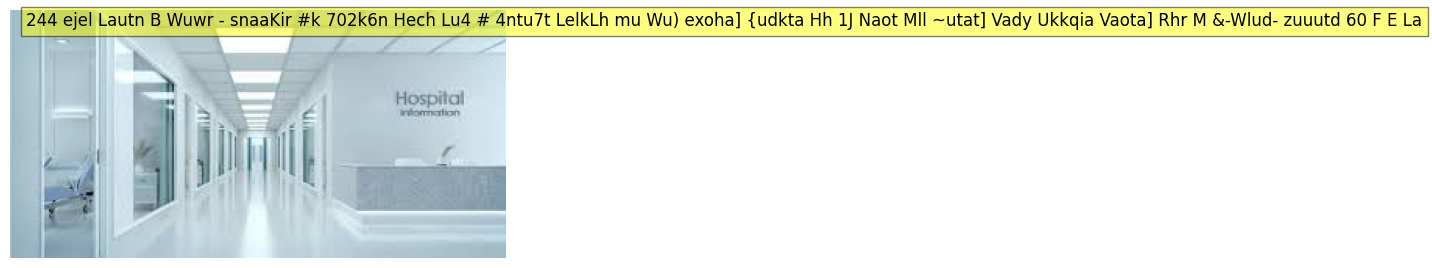

           reception  chair
object_1  white wall    NaN
object_2         NaN  white
Structured data saved to 'object_data_summary.csv'.


In [16]:
from google.colab import files

# Upload the original image
uploaded = files.upload()

# List the uploaded files and get the file name
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# Replace 'path_to_original_image.jpg' with the actual uploaded file name
original_image_path = list(uploaded.keys())[0]

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Function to plot the original image with annotations
def plot_annotated_image(image_path, object_texts):
    # Load the original image
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')

    # Annotate the image with object texts
    for obj_image, text in object_texts.items():
        # Assuming object images have coordinates, replace with actual coordinates if available
        x, y = 10, 10  # Example coordinates
        plt.text(x, y, text, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')

    plt.show()


object_summaries = {
    'object_1': {'reception': 'white wall'},
    'object_2': {'chair': 'white'}
}

# Plot the annotated image
plot_annotated_image(original_image_path, object_texts)

# Create a table summarizing all data mapped to each object
df_structured_data = pd.DataFrame.from_dict(object_summaries, orient='index')
print(df_structured_data)

# Save the table as a CSV file
df_structured_data.to_csv('object_data_summary.csv', index=False)
print("Structured data saved to 'object_data_summary.csv'.")
